In [140]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline 

In [141]:
df=pd.read_csv('train.csv')

In [142]:
df.head()

,id,created_at,campaign_var_1,campaign_var_2,products_purchased,signup_date,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,user_activity_var_5,user_activity_var_6,user_activity_var_7,user_activity_var_8,user_activity_var_9,user_activity_var_10,user_activity_var_11,user_activity_var_12,buy
0,1,2021-01-01,1,2,2.0,2020-09-24,0,0,0,0,0,0,1,1,0,0,0,0,0
1,2,2021-01-01,2,1,2.0,2020-09-19,1,0,1,0,0,0,1,0,0,0,0,0,0
2,3,2021-01-01,9,3,3.0,2021-08-11,1,0,0,0,0,0,0,0,0,0,0,0,0
3,4,2021-01-01,6,7,2.0,2017-10-04,0,0,0,0,0,0,0,0,0,0,0,0,0
4,5,2021-01-01,4,6,NaN,2020-06-08,0,0,0,0,0,0,1,0,0,0,1,0,0


In [143]:
df.describe()

,id,campaign_var_1,campaign_var_2,products_purchased,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,user_activity_var_5,user_activity_var_6,user_activity_var_7,user_activity_var_8,user_activity_var_9,user_activity_var_10,user_activity_var_11,user_activity_var_12,buy
count,39161.000000,39161.000000,39161.000000,18250.000000,39161.000000,39161.000000,39161.000000,39161.000000,39161.000000,39161.000000,39161.000000,39161.000000,39161.000000,39161.000000,39161.000000,39161.000000,39161.000000
mean,19581.000000,6.523812,6.452746,2.154137,0.400092,0.006716,0.102832,0.011465,0.151503,0.499834,0.286612,0.174434,0.011440,0.000383,0.218942,0.000562,0.051020
std,11304.951283,3.472944,2.614296,0.779815,0.509194,0.081676,0.303743,0.106463,0.359681,0.558166,0.455784,0.379689,0.106346,0.019568,0.431544,0.023696,0.220042
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9791.000000,4.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,19581.000000,6.000000,6.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,29371.000000,9.000000,8.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,39161.000000,16.000000,15.000000,4.000000,3.000000,1.000000,1.000000,1.000000,2.000000,3.000000,2.000000,2.000000,1.000000,1.000000,4.000000,1.000000,1.000000


In [144]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39161 entries, 0 to 39160
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    39161 non-null  int64  
 1   created_at            39161 non-null  object 
 2   campaign_var_1        39161 non-null  int64  
 3   campaign_var_2        39161 non-null  int64  
 4   products_purchased    18250 non-null  float64
 5   signup_date           24048 non-null  object 
 6   user_activity_var_1   39161 non-null  int64  
 7   user_activity_var_2   39161 non-null  int64  
 8   user_activity_var_3   39161 non-null  int64  
 9   user_activity_var_4   39161 non-null  int64  
 10  user_activity_var_5   39161 non-null  int64  
 11  user_activity_var_6   39161 non-null  int64  
 12  user_activity_var_7   39161 non-null  int64  
 13  user_activity_var_8   39161 non-null  int64  
 14  user_activity_var_9   39161 non-null  int64  
 15  user_activity_var_1

## Treating Missing values

In [145]:
missing=df['products_purchased'].isna().sum()

In [146]:
print("\n Total number of missing values: {0} which is {1} percentage of given data "
      .format(missing,(missing/len(df['products_purchased'])*100)))


 Total number of missing values: 20911 which is 53.39751283164372 percentage of given data 


In [147]:
missing=df[df['products_purchased'].isna()]

In [148]:
missing['buy'].value_counts()

0    19866
1     1045
Name: buy, dtype: int64

In [149]:
df['products_purchased'].value_counts()

2.0    8867
3.0    5024
1.0    3643
4.0     716
Name: products_purchased, dtype: int64

In [150]:
df['products_purchased']=df['products_purchased'].fillna(1)
df['products_purchased'].value_counts()

1.0    24554
2.0     8867
3.0     5024
4.0      716
Name: products_purchased, dtype: int64

## Data type conversion

In [151]:
df['buy']=df['buy'].astype('int64')

In [152]:
df['created_at']=pd.to_datetime(df['created_at'])
df['signup_date']=pd.to_datetime(df['signup_date'])

In [153]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39161 entries, 0 to 39160
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    39161 non-null  int64         
 1   created_at            39161 non-null  datetime64[ns]
 2   campaign_var_1        39161 non-null  int64         
 3   campaign_var_2        39161 non-null  int64         
 4   products_purchased    39161 non-null  float64       
 5   signup_date           24048 non-null  datetime64[ns]
 6   user_activity_var_1   39161 non-null  int64         
 7   user_activity_var_2   39161 non-null  int64         
 8   user_activity_var_3   39161 non-null  int64         
 9   user_activity_var_4   39161 non-null  int64         
 10  user_activity_var_5   39161 non-null  int64         
 11  user_activity_var_6   39161 non-null  int64         
 12  user_activity_var_7   39161 non-null  int64         
 13  user_activity_va

In [154]:
df['created_at'].value_counts()

2021-12-26    181
2021-12-09    180
2021-12-21    179
2021-12-07    179
2021-12-04    178
             ... 
2021-01-07     34
2021-01-14     33
2021-01-06     29
2021-01-22     26
2021-01-01     21
Name: created_at, Length: 365, dtype: int64

In [155]:
df['campaign_var_1'].value_counts()

6     4061
5     4060
4     4018
3     3784
7     3756
2     3486
8     3407
9     2866
10    2392
11    1873
1     1593
12    1455
13    1059
14     714
15     456
16     181
Name: campaign_var_1, dtype: int64

<AxesSubplot:xlabel='campaign_var_1', ylabel='Count'>

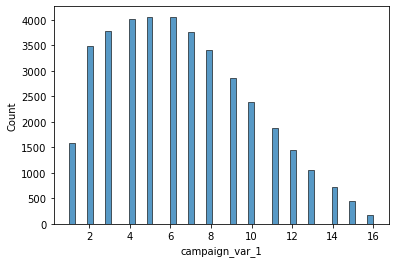

In [156]:
sns.histplot(df['campaign_var_1'])

<AxesSubplot:xlabel='campaign_var_2', ylabel='Count'>

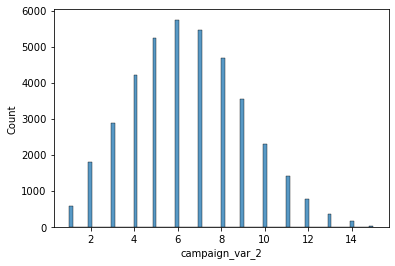

In [157]:
sns.histplot(df['campaign_var_2'])

## When we campaign the product at on average 4 to 6 times the customers are likely to buy the products

## As campaign increase than avg chance of buying the product are less.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='buy', ylabel='count'>

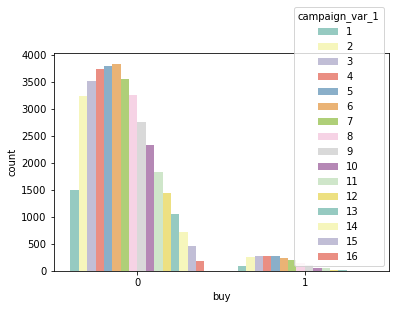

In [158]:
sns.countplot(df['buy'],hue='campaign_var_1',data=df,palette="Set3")

### The dataset have imbalanced target data.

In [159]:
df['buy'].value_counts()

0    37163
1     1998
Name: buy, dtype: int64

In [262]:
#from collections import Counter
#counter=Counter(df['buy'])
#counter

### Finding the exact months between signup date and created

In [160]:
df['diff_date']=abs((df['created_at']-df['signup_date'])/np.timedelta64(1,'M'))

In [161]:
df['diff_date']=df['diff_date'].fillna(0)

In [162]:
df['diff_date']=df['diff_date'].astype('int')

<AxesSubplot:ylabel='Frequency'>

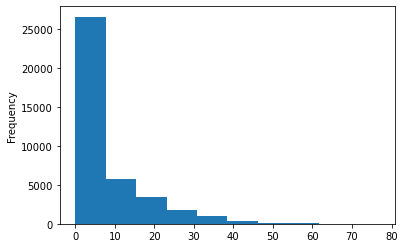

In [163]:
df['diff_date'].plot(kind='hist')

In [164]:
df.describe()

,id,campaign_var_1,campaign_var_2,products_purchased,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,user_activity_var_5,user_activity_var_6,user_activity_var_7,user_activity_var_8,user_activity_var_9,user_activity_var_10,user_activity_var_11,user_activity_var_12,buy,diff_date
count,39161.000000,39161.000000,39161.000000,39161.000000,39161.000000,39161.000000,39161.000000,39161.000000,39161.000000,39161.000000,39161.000000,39161.000000,39161.000000,39161.000000,39161.000000,39161.000000,39161.000000,39161.000000
mean,19581.000000,6.523812,6.452746,1.537857,0.400092,0.006716,0.102832,0.011465,0.151503,0.499834,0.286612,0.174434,0.011440,0.000383,0.218942,0.000562,0.051020,7.020786
std,11304.951283,3.472944,2.614296,0.784134,0.509194,0.081676,0.303743,0.106463,0.359681,0.558166,0.455784,0.379689,0.106346,0.019568,0.431544,0.023696,0.220042,10.083764
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9791.000000,4.000000,5.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,19581.000000,6.000000,6.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
75%,29371.000000,9.000000,8.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11.000000
max,39161.000000,16.000000,15.000000,4.000000,3.000000,1.000000,1.000000,1.000000,2.000000,3.000000,2.000000,2.000000,1.000000,1.000000,4.000000,1.000000,1.000000,77.000000


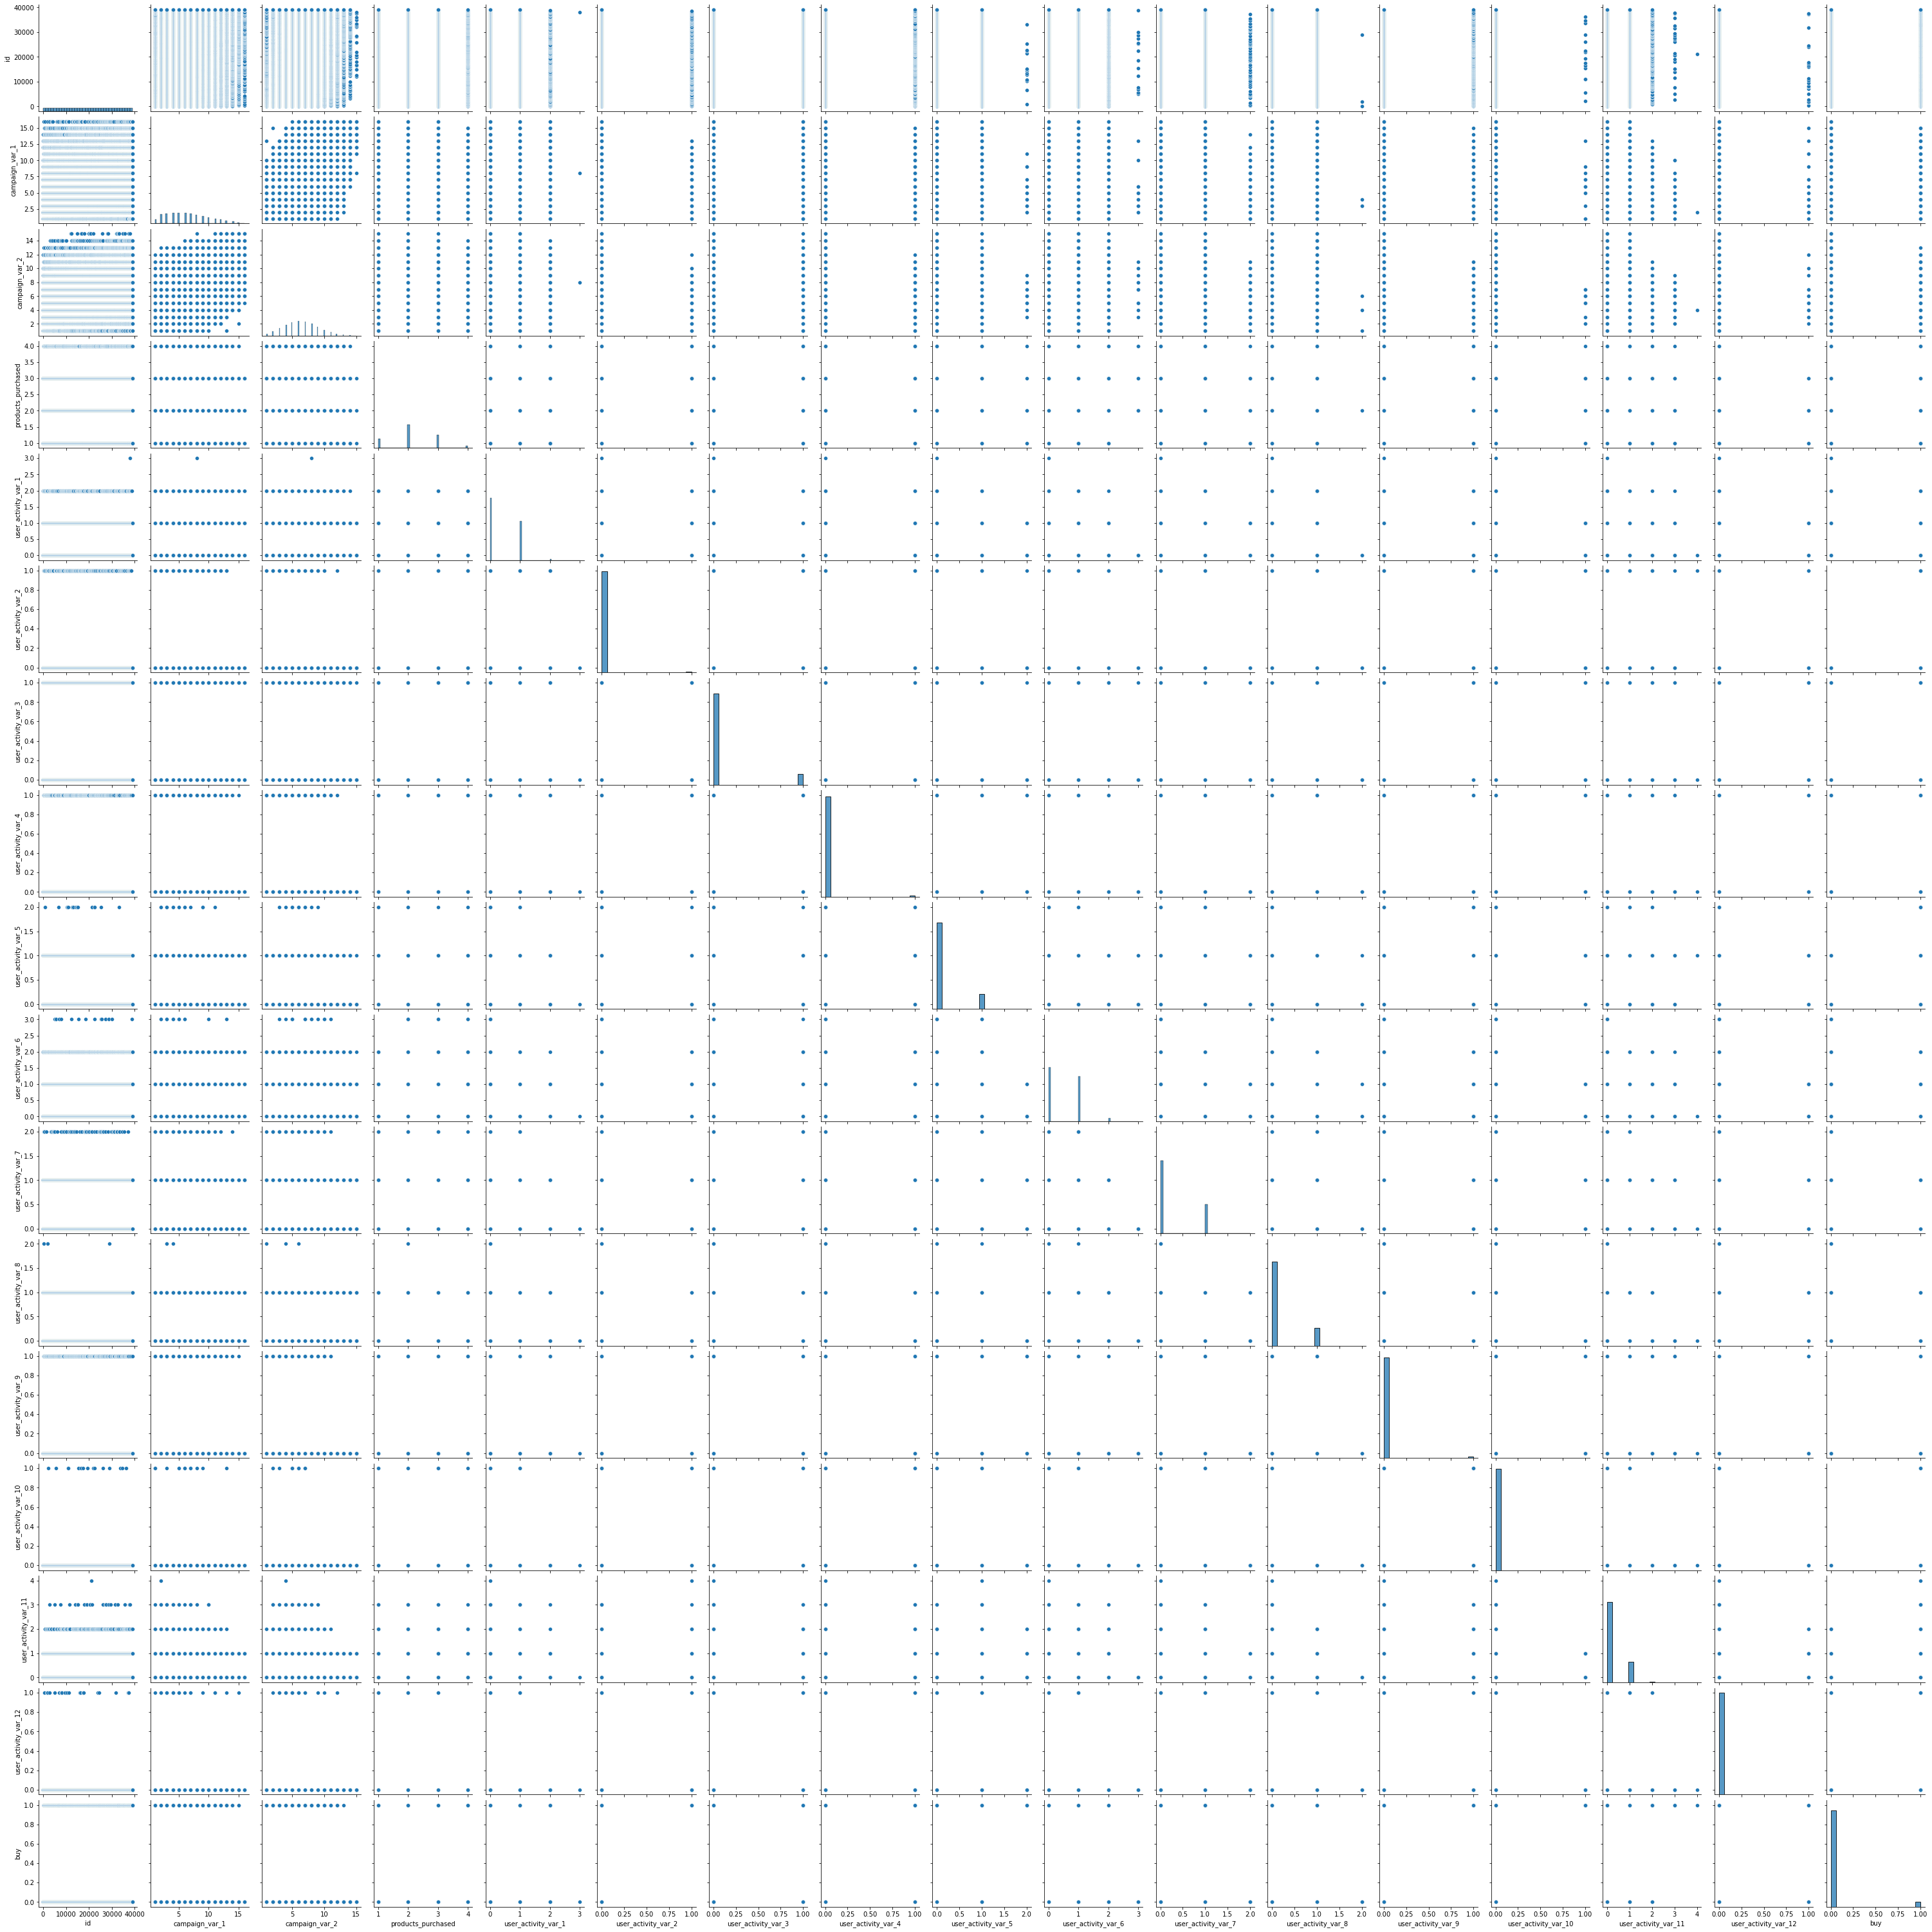

In [44]:
sns.pairplot(df)

<AxesSubplot:>

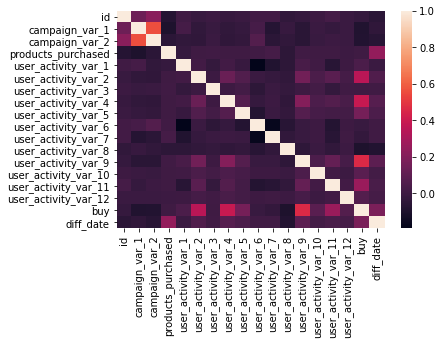

In [165]:
sns.heatmap(df.corr())

## Drop the less important features.
### user_activity_var_6 and user_activity_var_7 are more less similar and have some negative correlation. 

In [166]:
df_final=df.drop(['id','created_at','signup_date','user_activity_var_6'],axis=1)
df_final.head()

,campaign_var_1,campaign_var_2,products_purchased,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,user_activity_var_5,user_activity_var_7,user_activity_var_8,user_activity_var_9,user_activity_var_10,user_activity_var_11,user_activity_var_12,buy,diff_date
0,1,2,2.0,0,0,0,0,0,1,1,0,0,0,0,0,3
1,2,1,2.0,1,0,1,0,0,1,0,0,0,0,0,0,3
2,9,3,3.0,1,0,0,0,0,0,0,0,0,0,0,0,7
3,6,7,2.0,0,0,0,0,0,0,0,0,0,0,0,0,38
4,4,6,1.0,0,0,0,0,0,1,0,0,0,1,0,0,6


In [199]:
y=df_final['buy']
x=df_final.drop(['buy'],axis=1)

In [168]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39161 entries, 0 to 39160
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   campaign_var_1        39161 non-null  int64  
 1   campaign_var_2        39161 non-null  int64  
 2   products_purchased    39161 non-null  float64
 3   user_activity_var_1   39161 non-null  int64  
 4   user_activity_var_2   39161 non-null  int64  
 5   user_activity_var_3   39161 non-null  int64  
 6   user_activity_var_4   39161 non-null  int64  
 7   user_activity_var_5   39161 non-null  int64  
 8   user_activity_var_7   39161 non-null  int64  
 9   user_activity_var_8   39161 non-null  int64  
 10  user_activity_var_9   39161 non-null  int64  
 11  user_activity_var_10  39161 non-null  int64  
 12  user_activity_var_11  39161 non-null  int64  
 13  user_activity_var_12  39161 non-null  int64  
 14  diff_date             39161 non-null  int32  
dtypes: float64(1), int3

In [169]:
# create the scaler for different of month feature 

#x['diff_date']= (x['diff_date']-x['diff_date'].min())/(x['diff_date'].max()-x['diff_date'].min())

In [170]:
#x.head()

,campaign_var_1,campaign_var_2,products_purchased,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,user_activity_var_5,user_activity_var_7,user_activity_var_8,user_activity_var_9,user_activity_var_10,user_activity_var_11,user_activity_var_12,diff_date
0,1,2,2.0,0,0,0,0,0,1,1,0,0,0,0,0.038961
1,2,1,2.0,1,0,1,0,0,1,0,0,0,0,0,0.038961
2,9,3,3.0,1,0,0,0,0,0,0,0,0,0,0,0.090909
3,6,7,2.0,0,0,0,0,0,0,0,0,0,0,0,0.493506
4,4,6,1.0,0,0,0,0,0,1,0,0,0,1,0,0.077922


### Using Smote techniques balancing the target class

In [171]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
x_resampled,y_resampled = smote.fit_resample(x,y)

In [172]:
y_resampled.value_counts()

0    37163
1    37163
Name: buy, dtype: int64

### Training the model

In [200]:
import sklearn.model_selection as ms
x_train,x_test,y_train,y_test=ms.train_test_split(x,y,test_size=0.3, random_state=111)

In [174]:
from xgboost import XGBClassifier
model=XGBClassifier()

In [201]:
model_fit = model.fit(x_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:10:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [202]:
train_pred = model_fit.predict(x_train)
test_pred = model_fit.predict(x_test)

In [203]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix,f1_score

In [204]:
print("Training:")
print(f1_score(y_train, train_pred,average='macro'))
print(classification_report(y_train, train_pred))
print(confusion_matrix(y_train, train_pred))



Training:
0.8785746702635355
              precision    recall  f1-score   support

           0       0.98      1.00      0.99     26029
           1       0.98      0.63      0.77      1383

    accuracy                           0.98     27412
   macro avg       0.98      0.81      0.88     27412
weighted avg       0.98      0.98      0.98     27412

[[26014    15]
 [  513   870]]


In [205]:
print("Testing:")
print(classification_report(y_test, test_pred))
print(f1_score(y_test, test_pred,average='macro'))
print(confusion_matrix(y_test, test_pred))

Testing:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99     11134
           1       0.88      0.54      0.67       615

    accuracy                           0.97     11749
   macro avg       0.93      0.77      0.83     11749
weighted avg       0.97      0.97      0.97     11749

0.8277507295969855
[[11090    44]
 [  283   332]]


## Using Resampled data after smote

In [206]:
x_train,x_test,y_train,y_test=ms.train_test_split(x_resampled,y_resampled,test_size=0.3, random_state=111)

model_1=XGBClassifier()

model_fit_1 = model_1.fit(x_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:11:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [207]:
train_pred = model_fit_1.predict(x_train)
test_pred = model_fit_1.predict(x_test)

In [208]:
print("Training Resampled:")
print(f1_score(y_train, train_pred,average='macro'))
print(classification_report(y_train, train_pred))
print(confusion_matrix(y_train, train_pred))

Training Resampled:
0.9730865960240334
              precision    recall  f1-score   support

           0       0.96      0.99      0.97     25957
           1       0.99      0.96      0.97     26071

    accuracy                           0.97     52028
   macro avg       0.97      0.97      0.97     52028
weighted avg       0.97      0.97      0.97     52028

[[25662   295]
 [ 1105 24966]]


In [209]:
print("Testing:")
print(classification_report(y_test, test_pred))
print(f1_score(y_test, test_pred,average='macro'))
print(confusion_matrix(y_test, test_pred))

Testing:
              precision    recall  f1-score   support

           0       0.95      0.98      0.97     11206
           1       0.98      0.95      0.97     11092

    accuracy                           0.97     22298
   macro avg       0.97      0.97      0.97     22298
weighted avg       0.97      0.97      0.97     22298

0.9681440623919033
[[11032   174]
 [  536 10556]]


## Using the training model prediciting the test data class

In [210]:
df_test=pd.read_csv('test.csv')

In [211]:
df_test.head()

,id,created_at,campaign_var_1,campaign_var_2,products_purchased,signup_date,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,user_activity_var_5,user_activity_var_6,user_activity_var_7,user_activity_var_8,user_activity_var_9,user_activity_var_10,user_activity_var_11,user_activity_var_12
0,39162,2022-01-01,2,2,NaN,2021-08-17,1,1,0,0,0,1,0,0,0,0,1,0
1,39163,2022-01-01,4,7,3.0,2020-05-21,1,0,0,0,0,0,0,1,0,0,0,0
2,39164,2022-01-01,8,7,NaN,NaN,0,0,0,0,1,1,0,0,0,0,0,0
3,39165,2022-01-01,9,8,2.0,2020-06-22,0,0,0,0,1,1,1,0,0,0,2,0
4,39166,2022-01-01,4,5,2.0,2021-03-10,1,0,0,0,0,0,0,0,0,0,0,0


In [212]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13184 entries, 0 to 13183
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    13184 non-null  int64  
 1   created_at            13184 non-null  object 
 2   campaign_var_1        13184 non-null  int64  
 3   campaign_var_2        13184 non-null  int64  
 4   products_purchased    5048 non-null   float64
 5   signup_date           6535 non-null   object 
 6   user_activity_var_1   13184 non-null  int64  
 7   user_activity_var_2   13184 non-null  int64  
 8   user_activity_var_3   13184 non-null  int64  
 9   user_activity_var_4   13184 non-null  int64  
 10  user_activity_var_5   13184 non-null  int64  
 11  user_activity_var_6   13184 non-null  int64  
 12  user_activity_var_7   13184 non-null  int64  
 13  user_activity_var_8   13184 non-null  int64  
 14  user_activity_var_9   13184 non-null  int64  
 15  user_activity_var_1

In [213]:
df_test['products_purchased'].value_counts()

2.0    2484
3.0    1260
1.0    1106
4.0     198
Name: products_purchased, dtype: int64

### Treating the missing values and data conversion

In [214]:
df_test['products_purchased']=df_test['products_purchased'].fillna(1)
df_test['products_purchased'].value_counts()

1.0    9242
2.0    2484
3.0    1260
4.0     198
Name: products_purchased, dtype: int64

In [215]:
df_test['created_at']=pd.to_datetime(df_test['created_at'])
df_test['signup_date']=pd.to_datetime(df_test['signup_date'])

df_test['diff_date']=abs((df_test['created_at']-df_test['signup_date'])/np.timedelta64(1,'M'))
df_test['diff_date']=df_test['diff_date'].fillna(0)
df_test['diff_date']=df_test['diff_date'].astype('int')

In [216]:
df_test_final_1=df_test.copy()
df_test_final=df_test.drop(['id','created_at','signup_date','user_activity_var_6'],axis=1)
df_test_final.head()

,campaign_var_1,campaign_var_2,products_purchased,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,user_activity_var_5,user_activity_var_7,user_activity_var_8,user_activity_var_9,user_activity_var_10,user_activity_var_11,user_activity_var_12,diff_date
0,2,2,1.0,1,1,0,0,0,0,0,0,0,1,0,4
1,4,7,3.0,1,0,0,0,0,0,1,0,0,0,0,19
2,8,7,1.0,0,0,0,0,1,0,0,0,0,0,0,0
3,9,8,2.0,0,0,0,0,1,1,0,0,0,2,0,18
4,4,5,2.0,1,0,0,0,0,0,0,0,0,0,0,9


### Model Prediction

In [217]:
final_pred = model_fit.predict(df_test_final)

In [218]:
df_test_final_1['buy']=final_pred

In [219]:
df_test_final_1.drop(df_test_final_1.columns.difference(['id','buy']),axis=1,inplace=True)
df_test_final_1.head()
df_test_final_1['buy'].value_counts()

0    12839
1      345
Name: buy, dtype: int64

In [220]:
df_test_final_1.to_csv('submission15.csv',index=False)

In [221]:
final_pred_resampled = model_fit_1.predict(df_test_final)
df_test_final_2=df_test.copy()
df_test_final_2['buy']=final_pred_resampled
df_test_final_2.drop(df_test_final_2.columns.difference(['id','buy']),axis=1,inplace=True)


In [222]:
df_test_final_2['buy'].value_counts()

0    10796
1     2388
Name: buy, dtype: int64

In [223]:
df_test_final_1.to_csv('submission_16.csv',index=False)

In [197]:
df.groupby('campaign_var_1')['buy'].value_counts()

campaign_var_1  buy
1               0      1496
                1        97
2               0      3237
                1       249
3               0      3508
                1       276
4               0      3741
                1       277
5               0      3793
                1       267
6               0      3833
                1       228
7               0      3557
                1       199
8               0      3255
                1       152
9               0      2763
                1       103
10              0      2331
                1        61
11              0      1825
                1        48
12              0      1431
                1        24
13              0      1047
                1        12
14              0       712
                1         2
15              0       453
                1         3
16              0       181
Name: buy, dtype: int64

In [198]:
df.groupby('campaign_var_2')['buy'].value_counts()

campaign_var_2  buy
1               0       567
                1        22
2               0      1684
                1       104
3               0      2713
                1       170
4               0      3885
                1       328
5               0      4870
                1       380
6               0      5379
                1       365
7               0      5179
                1       293
8               0      4501
                1       189
9               0      3435
                1       102
10              0      2264
                1        34
11              0      1403
                1         7
12              0       758
                1         3
13              0       350
                1         1
14              0       151
15              0        24
Name: buy, dtype: int64